
# 作業目標:
    
    了解keras 模型架構


# 作業重點:
    
    請修改input shape: (Conv2D(64, (3, 3))的設定, 新增一層 Dense 並觀看 model.summary 的輸出


In [1]:
# 載入必須使用的 Library
import keras
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 50

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# build our CNN model, 多加幾層
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True, 
                    callbacks=[early_stopping, reduce_lr])

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 16s 403us/step - loss: 2.2451 - acc: 0.2221 - val_loss: 1.7815 - val_acc: 0.3111
Epoch 2/50
40000/40000 [==============================] - 15s 365us/step - loss: 1.8536 - acc: 0.2718 - val_loss: 1.8326 - val_acc: 0.2806
Epoch 3/50
40000/40000 [==============================] - 15s 363us/step - loss: 1.7491 - acc: 0.3325 - val_loss: 2.0523 - val_acc: 0.2764
Epoch 4/50
40000/40000 [==============================] - 15s 364us/step - loss: 1.6554 - acc: 0.3780 - val_loss: 1.6112 - val_acc: 0.4134
Epoch 5/50
40000/40000 [==============================] - 15s 365us/step - loss: 1.5808 - acc: 0.4121 - val_loss: 1.3031 - val_acc: 0.5583
Epoch 6/50
40000/40000 [==============================] - 15s 365us/step - loss: 1.5254 - acc: 0.4318 - val_loss: 1.3337 - val_acc: 0.5551
Epoch 7/50
40000/40000 [==============================] - 15s 365us/step - loss: 1.4568 - acc: 0.4597 - val_loss: 1.

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    # plot results
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.title('Loss')
    epochs = len(loss)
    plt.plot(range(epochs), loss, marker='.', label='loss')
    plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(2,1,2)
    plt.title('Accuracy')
    plt.plot(range(epochs), acc, marker='.', label='acc')
    plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
    plt.legend(loc='best')
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)
    ax.set_facecolor('snow')
    plt.grid(color='lightgray', linestyle='-', linewidth=1)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()

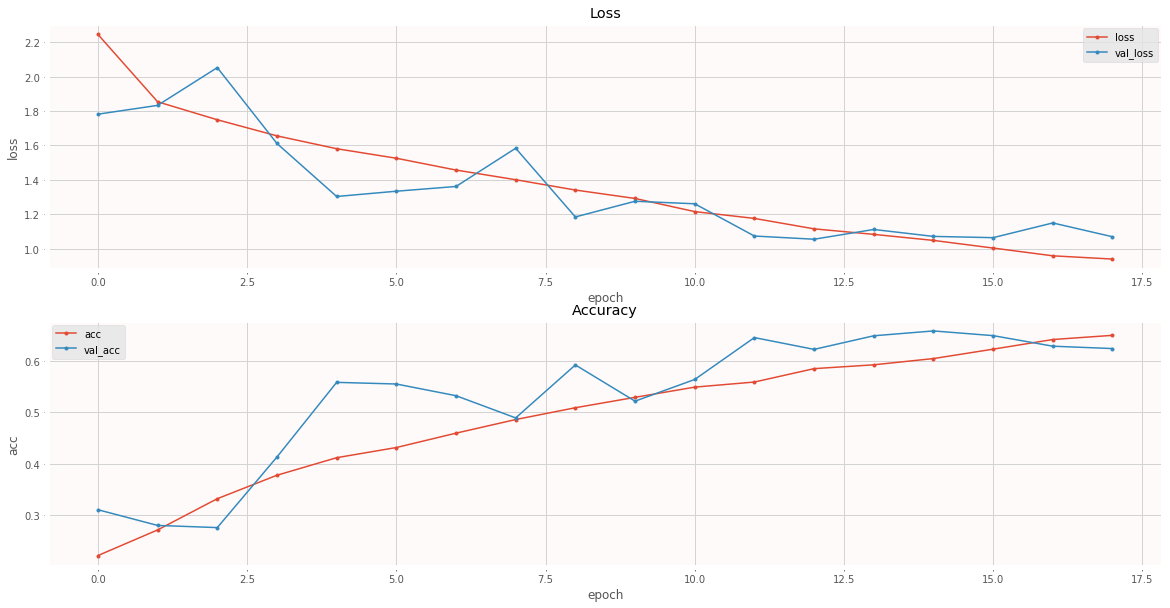

In [5]:
plot_history(history)

In [6]:
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {:.4f}".format(test_acc))

Test accuracy: 0.6141
